# Drawing Bloch vector of a density matrix

Creating matplotlib software to draw Bloch vector given a density matrix for single qubit state. 

From Exercise 2.72 in *Quantum Computation and Quantum Information* by Nielsen and Chuang, an arbitrary density matrix for a single qubit can be written as 
$$ \rho = \frac{I + \vec{r} \cdot \vec{\sigma}}{2}$$
where $\vec{\sigma}$ is the vector of Pauli $X$, $Y$, and $Z$ matrices. The $3$-d real vector is the Bloch vector. 

A state $\rho$ is pure if and only if $\vec{r}$ is a unit vector. 

In [74]:
import numpy as np

# Global variables 
eps = 0.0001

In [2]:
def gen_density_matrix(states, probs):
    """
    Generate a density matrix from an array of 1-qubit states with an array of their corresponding probabilities. 
    """
    if len(states) != len(probs):
        raise ValueError('Size of `states` and `probs` arrays must be the same.')
    if np.sum(probs) != 1: 
        raise ValueError('Probabilities must sum to 1.')
    for state in states: 
        if np.shape(state) != (2,):
            raise ValueError('Each state must be a 2-dimensional vector. ')
        if np.linalg.norm(state) < 1-eps or np.linalg.norm(state) > 1+eps:
            raise ValueError('Each state must have norm 1. ')
    
    rho = np.zeros((2,2))
    for i in range(len(states)):
        conj = np.conj(states[i])
        for j in range(len(conj)):
            # Add probs[i] * conj[j] * states[i] to column j of rho 
            # We use np.dot because otherwise 0 multiplication results in scalar
            rho[:, j] = rho[:, j] + np.dot(probs[i], np.dot(conj[j],states[i]))
    return rho

In [3]:
def validate(rho):
    """
    Validate rho as a valid single-qubit density matrix. 
    Raise error if rho fails. 
    """
    # Verify rho is 2x2
    if np.shape(rho) != (2, 2):
        raise ValueError('Rho must be a 2x2 matrix.')
    
    # Verify rho has trace 1 
    if np.trace(rho) < 1-eps or np.trace(rho) > 1+eps: 
        raise ValueError('Rho must have trace 1.')
    
    # Verify rho is a positive operator. We do this by using the generalized Sylvester's criterion for 
    # positive semidefiniteness: check that the determinant of all principal minors of rho are >= 0
    if rho[0][0] < 0 or rho[1][1] < 0 or np.linalg.det(rho) < 0: 
        raise ValueError('Rho must be a positive operator. ')

In [4]:
def bloch_vector_from_density(rho):
    """
    Returns r vector. 
    """
    # Check to make sure rho is a legit density matrix 
    validate(rho)
    
    # Simplify to get r x sigma on one side of equation 
    pauli_weighted = np.dot(2, rho) - np.eye(2)
    
    # Define Pauli matrices 
    X = np.array([[0, 1], [1, 0]])
    Y = np.array([[0, -1j], [1j, 0]])
    Z = np.array([[1, 0], [0, -1]])
    
    # Do inner product with Pauli X, Y, Z to get r vector coefficients 
    r = np.zeros(3)
    r[0] = HS_inner_product(X, pauli_weighted) / HS_inner_product(X, X)
    r[1] = HS_inner_product(Y, pauli_weighted) / HS_inner_product(Y, Y)
    r[2] = HS_inner_product(Z, pauli_weighted) / HS_inner_product(Z, Z)
    
    return r
    
def HS_inner_product(M1, M2):
    # Hilbert-Schmidt inner product is defined as Tr(M1*M2)
    return np.trace( np.dot( np.transpose(np.conjugate(M1)), M2 ) )

In [5]:
bloch_vector_from_density(gen_density_matrix([[1/np.sqrt(2), 1/np.sqrt(2)]], [1]))

/home/warren/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part


array([1., 0., 0.])

## Plotting Bloch vector

Using [this guide](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html).

In [60]:
from mpl_toolkits import mplot3d
%matplotlib inline 
#%matplotlib notebook 
import matplotlib.pyplot as plt 

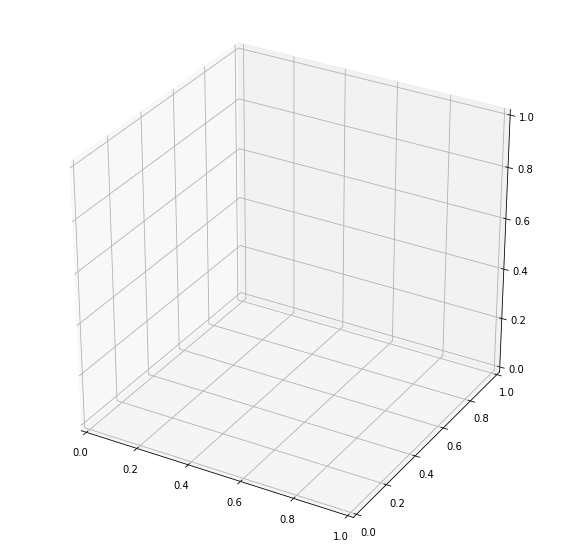

In [61]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

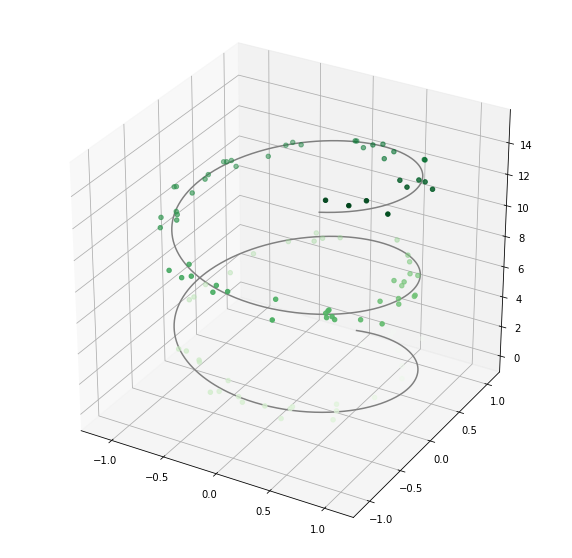

In [62]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

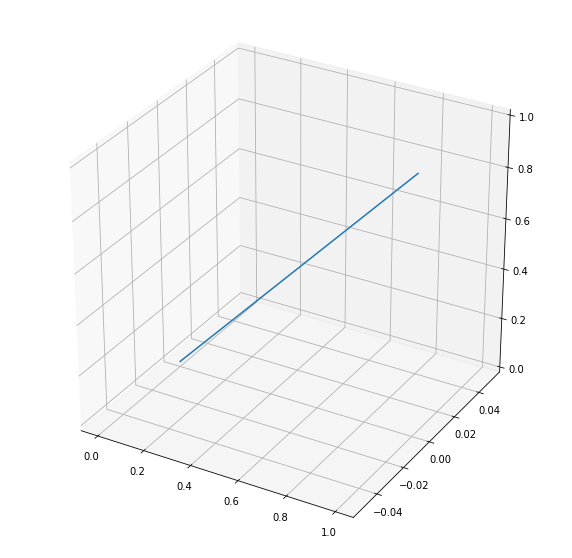

In [76]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

# theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
# z = np.linspace(-2, 2, 100)
# r = z**2 + 1
# x = r * np.sin(theta)
# y = r * np.cos(theta)
# ax.plot(x, y, z)

ax.plot([0, 1], [0, 0], [0, 1])

plt.savefig('foo.png', bbox_inches='tight')

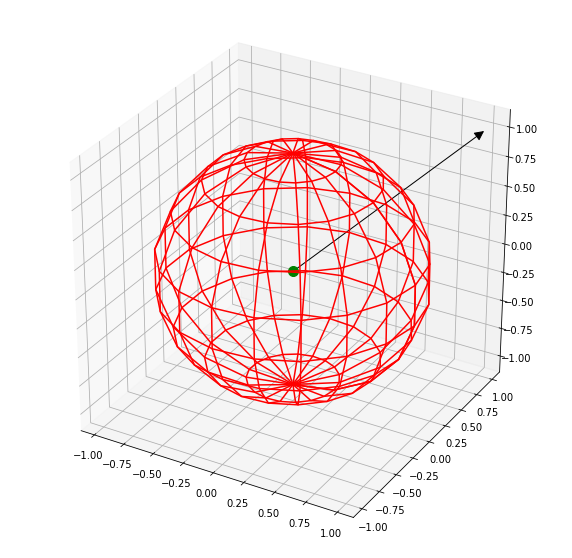

In [77]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations


fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
#ax.set_aspect("equal")

# draw sphere
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="r")

# draw a point
ax.scatter([0], [0], [0], color="g", s=100)

# draw a vector
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):

    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

a = Arrow3D([0, 1], [0, 1], [0, 1], mutation_scale=20,
            lw=1, arrowstyle="-|>", color="k")
ax.add_artist(a)
plt.savefig('foo.png', bbox_inches='tight')